<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Decision Tree</span> </h1>

There are 4 sections to help understand decision tree learning:
1. [The Visual Tree.](#DT1)
2. [The Common Algorithms and Hyperpaprameters.](#DT2)
3. [The Time & Space Complexity.](#DT3)
4. [Algorithm Pros % Cons.](#DT4)


### Instructions

<b>Data</b>: Iris

<b>Language</b>: Python 3 (Package scikit-learn)

<b>Tools</b>: Anaconda 3. Not required. There are 2 type of ways to run your desired algorithms.

1. IDE - Jupyter Notebook, Spyder, VS Code, PyCharm just name a few, all pretty good.
2. IDE with drag & drop - Orange, KNIME
3. More...

<b>Goal</b>: This workbook is intended to serve as a quick knowledge recap/template. As for now, this workbook doesn't contain how to present the result to clients which can be an addition later.<br><hr id="toc">

<br id="DT1">

# The Visual Tree

Decision Tree Model is considered as <b>white box models</b>.

In [59]:
# import data
from sklearn.datasets import load_iris
# Package - train decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import numpy as np
# package - display decision tree viz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
# to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [55]:
# only use Petal length & width data
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [67]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [70]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

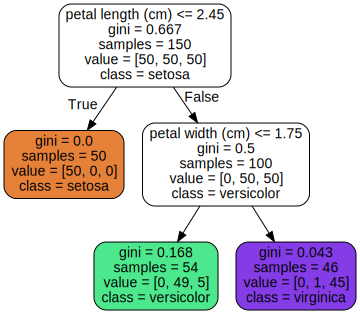

In [57]:
# Decision Tree
graph = Source(
    export_graphviz(
        tree_clf, 
        out_file=None, 
        feature_names=iris.feature_names[2:], 
        class_names=iris.target_names, 
        filled = True,
        rounded=True
    )
)
display(SVG(graph.pipe(format='svg')))

## Tree
The prediction process happens in a top-down pattern. 
* Depth 0 - Root Node
* Depth 1 - (L)Leaf Node (R)Child Node
* Depth 2 - (L)Leaf Node (R)Leaf Node

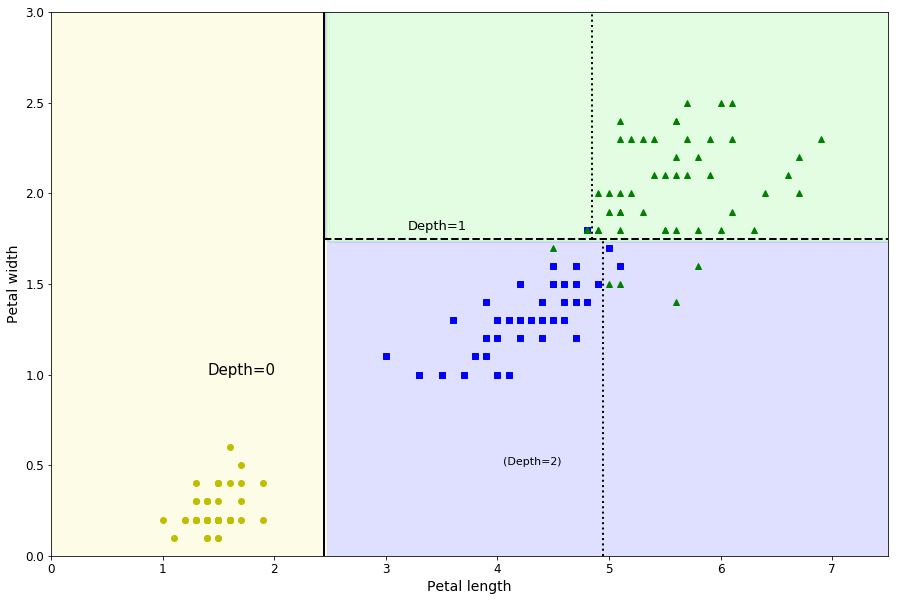

In [64]:
# Decision Tree Decision Boundaries
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(15, 10))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [65]:
# output Prediction Probability
# [petal length, petal width]
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [71]:
# output Prediction Category
# [petal length, petal width]
tree_clf.predict([[5, 1.5]])

array([1])

<br id="DT2">

# The Common Algorithms and Hyperparameters

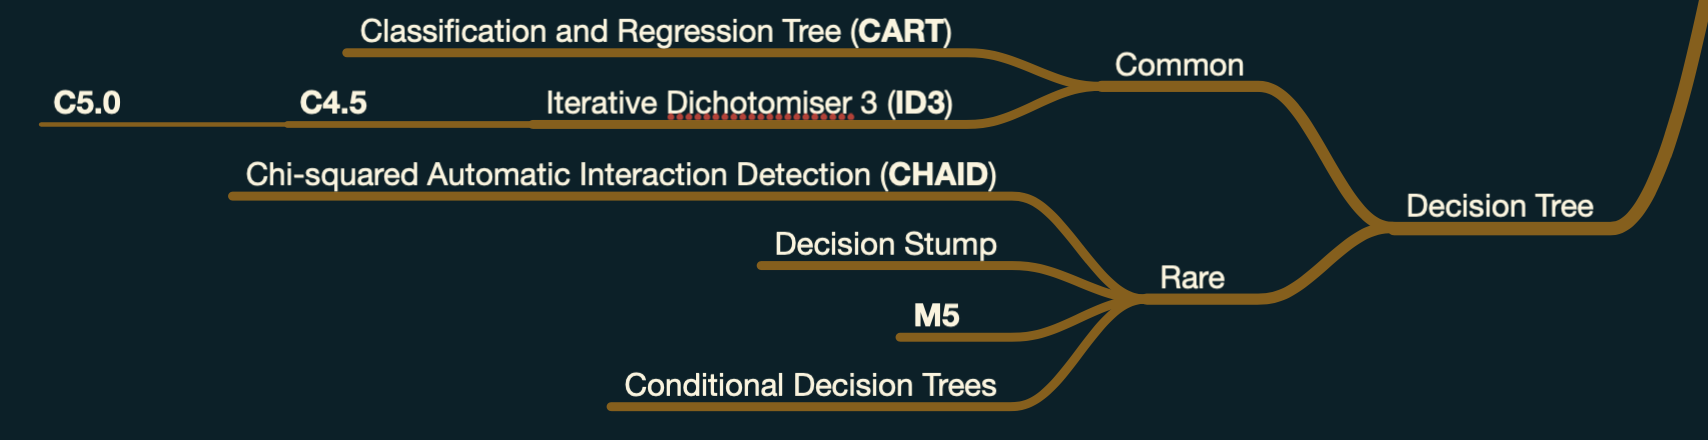

* CART - Classification and Regression Tree
* ID3 - Iterative Dichotomiser 3 -> Evolved as C4.5 -> Evolved as C5.0

| Algorithm | Classification | Regression |
| --- | --- | --- |
| CART | Yes | Yes |
| ID3 | Yes | No |
| C4.5 | Yes | Yes |
| C5.0 | Yes | Yes |

### CART
> <em>The algorithm first aplits the training set in 2 subset using a single feature $k$ and a threshold $t_k$. It searches the pair ($k$, $t_k$) that prodeuces the purest subsets by using Gini impurity $G$. Please beware that CART only produces binary trees. Nonleaf nodes always have two children. Above example uses CART classification model.</em> 

#### Gini Impurity
$G_i = 1 - \displaystyle\sum_{k=1}^{n} p_{i,k}^2$
* $P_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node.
The gini measures the node's impurity: a node is pure if all training instances it applies to belong to the same class.

In the above example, the depth-2 left node has a gini score as $1 - (\frac{0}{54})^2 - (\frac{49}{54})^2 - (\frac{5}{54})^2 \approx 0.168$

#### Cost Function for Classification
$J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$
* Where 
  \begin{cases}
    G_{left/right}       & \quad \text{is Gini impurity for left/right subset}\\
    m_{left/right}       & \quad \text{is the number of instances in the left/right subset}
  \end{cases}


### ID3
> <em>The ID3 algorithm begins with the original set $S$ as the root node. On each iteration of the algorithm, it iterates through every unused attribute of the set $S$ and calculates the entropy $H(S)$ or information gain $IG(S)$ of that attribute. The reduction of entropy is called information gain.</em>

#### Entropy
$H_i = - \displaystyle\sum_{k=1}^{n} p_{i,k}log(p_{i,k})$
* $p_{i,k}$ cannot be 0
The entropy is frequently used as an impurity measure: a set's entropy is zero when it contains instances of only one class.

In the above example, even though we didn't run it under ID3 but we can adjust hyperparameter to entropy when using CART. The depth-2 left node has a gini score as $- \frac{49}{54}log(\frac{49}{54}) - \frac{5}{54}log(\frac{5}{54}) \approx 0.31$


#### Cost Function - Information Gain
${\displaystyle IG(S,A)=\mathrm {H} {(S)}-\sum _{t\in T}p(t)\mathrm {H} {(t)}=\mathrm {H} {(S)}-\mathrm {H} {(S|A)}.}$
* $H(S)$ – Entropy of set $S$
* $T$ – The subsets created from splitting set $S$ by attribute $A$ such that $\displaystyle S=\bigcup _{t\in T}t$
* $p(t)$ – The proportion of the number of elements in $t$ to the number of elements in set $S$
* $H(t)$ – Entropy of subset $t$

| Comparison | Gini | Entropy |
| --- | --- | --- |
| Speed | `Faster` | `Slower` |
| Split | `isolating most frequent class in its own branch` | `slightly more balanced` |

### Regularization Hyperpaprameter
1. Reduce Max Depth (CART is greedy) - Reduce risk of overfitting
2. min_samples_split - the minimum number of samples a node must have before it can be split
3. min_samples_leaf - the minimum number of a leaf node must have
4. max_features - maximum number of features that are evaluated for splitting at each node

A general rule is that increasing min_* hyperparameter and reducing max_* hyperparameters will regularize the model 

In [72]:
from ipywidgets import interactive

In [79]:
# test hyperparameter
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(
            random_state = 0 
          , criterion = crit
          , splitter = split
          , max_depth = depth
          , min_samples_split = min_split
          , min_samples_leaf = min_leaf)
    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(
            estimator
          , out_file = None
          , feature_names = labels
          , class_names = iris.target_names
          , filled = True))

    display(SVG(graph.pipe(format='svg')))
    return estimator

# use float to present percentage
inter = interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth = [1,2,3,4]
   , min_split = (0.1,1)
   , min_leaf = (0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

<br id="DT3">

# The Time and Space Complexity

This part can be complicated. Here is more of a very rough estimate of how long it might take to run through all features using Big O notation.
$O(n*mlog(m))$

For example, if a training set contains 1,000,000 instances takes an hour, how long will it take for 10 times more instances.

Let's say $m = 10^6$, then we use $n*10m*log(10m)/n*m*log(m) = 10*log(10m)/log(m) \approx 11.7$ hours.

<br id="DT4">

# The Algorithm Pros & Cons

### Pros
Data Prep - Requires very little feature scaling/centering

### Cons
Instability - Sensitive to small variations in training data -> Random Forest to limit the instability by averaginh predictions over many trees.

More on https://scikit-learn.org/stable/modules/tree.html